# Research Question 1：
What is the association between stroke and some selected modifiable behaviour risk factors, namely smoking, alcohol intake, cholesterol level, hypertension and weight?

## Data exploration and pre-processing：
Missing values are filled with mean values.

## Data analysis
Data are ploted in bar charts. 

## Results
CVDSTRK3 (whether stroke) has four values, each with the follwowing number of entries. 

No-11894

Yes-417

Don't know/Not sure-22

Refused-5

We use SVM for classification and prediction, the accuracy rate reached 96%. 
Other metrics are also presented. (precision、recall、f1-score、support)

## Limitation
This model is only accurate in predicting 'has stroke' and not for other statuses. 
Potential reason is that the number of ' has stroke' samples outweighs other samples, therefore the machine learning model is not able to learn their patterns. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('brfss_for_bda_2021.csv')
print('Dataset Overview')
print(data.info())
print("Dataset Shape")
print(data.shape)
print('First 5 rows')
print(data.head(5))
print('Describe Info')
print(data.describe())

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12338 entries, 0 to 12337
Columns: 414 entries, _STATE to mracorg1
dtypes: float64(67), int64(34), object(313)
memory usage: 39.0+ MB
None
Dataset Shape
(12338, 414)
First 5 rows
     _STATE  _GEOSTR _DENSTR2       PRECALL  SECSCRFL  REPNUM  REPDEPTH  \
0  New York      207        D  To be called       NaN   40187         5   
1  New York      207        D  To be called       NaN   60025        21   
2  New York      203        D  To be called       NaN  120050         3   
3  New York      206        D  To be called       NaN   30066        28   
4  New York      203        D  To be called       NaN  110026        23   

     FMONTH     IDATE    IMONTH  ...  PPS_45  PPS_46  PPS_48  PPS_52  \
0     April   4092015     April  ...      No      No      No     Yes   
1      June   6232015      June  ...      No      No      No     Yes   
2  December  12282015  December  ...      No      No      No      No   
3     March   3

In [4]:
'''Data cleaning'''
print('Check null values')
print(data.isnull().sum())
data.fillna(data.mean())

Check null values
_STATE         0
_GEOSTR        0
_DENSTR2       0
PRECALL        0
SECSCRFL    3911
            ... 
cracorg1       0
_prace1        0
mracasc1       0
_impcty        0
mracorg1       0
Length: 414, dtype: int64


,_STATE,_GEOSTR,_DENSTR2,PRECALL,SECSCRFL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,...,PPS_45,PPS_46,PPS_48,PPS_52,childage,cracorg1,_prace1,mracasc1,_impcty,mracorg1
0,New York,207,D,To be called,2.627151,40187,5,April,4092015,April,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
1,New York,207,D,To be called,2.627151,60025,21,June,6232015,June,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
2,New York,203,D,To be called,2.627151,120050,3,December,12282015,December,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
3,New York,206,D,To be called,2.627151,30066,28,March,3182015,March,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
4,New York,203,D,To be called,2.627151,110026,23,November,11292015,November,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,New York,207,D,To be called,2.627151,40007,14,April,4162015,April,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
12334,New York,207,D,To be called,0.000000,60048,8,June,7102015,July,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
12335,New York,207,D,To be called,0.000000,70002,4,July,8152015,August,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
12336,New York,207,D,To be called,0.000000,70019,20,July,8092015,August,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...


***** CVDSTRK3 status statistics *****
No                     11894
Yes                      417
Don't know/Not sure       22
Refused                    5
Name: CVDSTRK3, dtype: int64


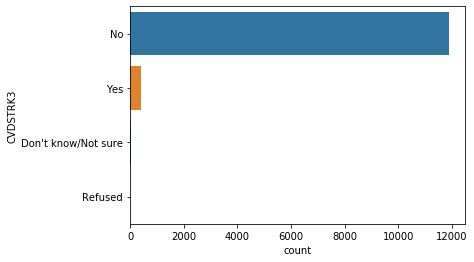

In [ ]:
print("***** CVDSTRK3 status statistics *****")
print(data.CVDSTRK3.value_counts())
sns.countplot(y='CVDSTRK3', data=data)

In [ ]:
data = data.loc[data['CVDSTRK3'].isin(['Yes','No'])]

In [ ]:
# Feature selection
x=data[['SMOKE100','AVEDRNK2','TOLDHI2','BPHIGH4','WEIGHT2']]
y=data[['CVDSTRK3']]

In [ ]:
# labeling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(x['SMOKE100'])
x.SMOKE100 = le.transform(x.SMOKE100)
# ----------------------------
le = LabelEncoder()
le.fit(x['AVEDRNK2'])
x.AVEDRNK2 = le.transform(x.AVEDRNK2)
# ----------------------------
le = LabelEncoder()
le.fit(x['TOLDHI2'])
x.TOLDHI2 = le.transform(x.TOLDHI2)
# ----------------------------
le = LabelEncoder()
le.fit(x['BPHIGH4'])
x.BPHIGH4 = le.transform(x.BPHIGH4)
# ----------------------------
le = LabelEncoder()
le.fit(x['WEIGHT2'])
x.WEIGHT2 = le.transform(x.WEIGHT2)
# ----------------------------
le = LabelEncoder()
le.fit(y['CVDSTRK3'])
y.CVDSTRK3 = le.transform(y.CVDSTRK3)

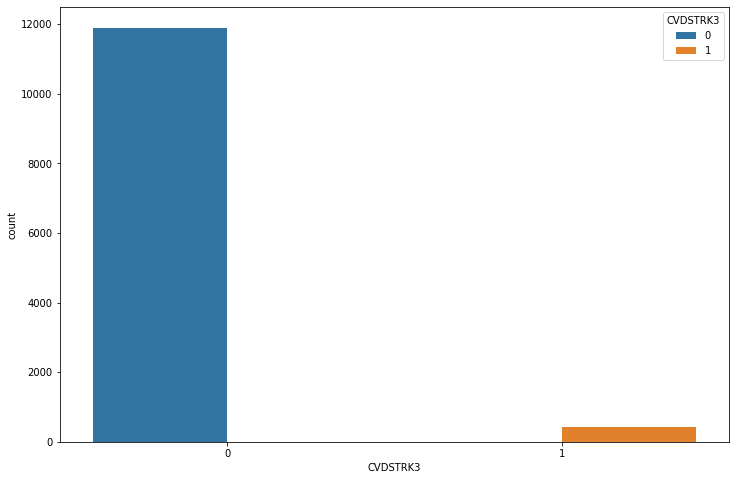

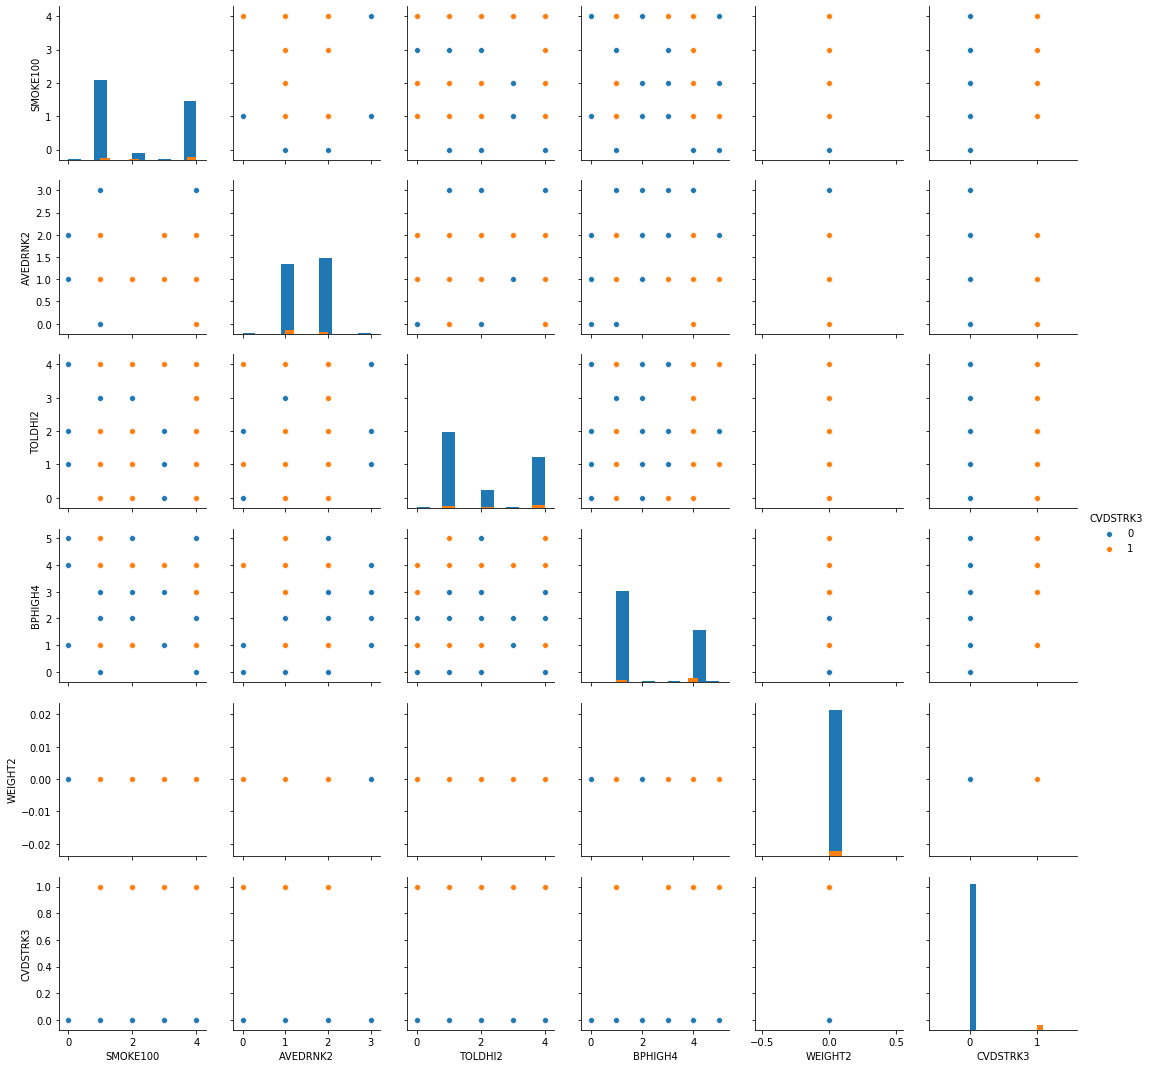

In [ ]:
# Visualize
data_choose=x.join(y, how='outer')
data_choose.to_csv('Result1.csv')

# Visualize
plt.figure(figsize=(12,8))
sns.countplot(x='CVDSTRK3',hue='CVDSTRK3', data=data_choose)
plt.show()

sns.pairplot(data=data_choose, diag_kind='hist', hue= 'CVDSTRK3')
plt.show()

## SVM Model

In [ ]:
'''Data split'''
# Splitting training and testing data into 8:2
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=10)
print("the shape of x_train data,{} and shape of x_test data {}:".format(x_train.shape,x_test.shape))
from sklearn.svm import SVC
SVM_clf = SVC(random_state=100)
SVM_clf.fit(x_train, y_train)
SVM_pred = SVM_clf.predict(x_test)
print('Support Vector Machines: ', round(accuracy_score(y_test, SVM_pred), 2))

the shape of x_train data,(8385, 5) and shape of x_test data (2097, 5):
Support Vector Machines:  0.97


In [ ]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.97      1.00      0.98      2024
           3       0.00      0.00      0.00        68

    accuracy                           0.97      2097
   macro avg       0.32      0.33      0.33      2097
weighted avg       0.93      0.97      0.95      2097

